In [1]:
import pandas as pd
import numpy as np

In [2]:
accept = pd.read_csv('/Users/mrseleznev/Desktop/дз сас 3/ВШЭ ПМИ ФКН ДЗ №3/6_accept.csv')
reject = pd.read_csv('/Users/mrseleznev/Desktop/дз сас 3/ВШЭ ПМИ ФКН ДЗ №3/6_reject.csv')

In [3]:
accept.head()

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0,OTHER,elementary,NaN,60000.0,0.0,0,NaN,NaN,33.347032,3.265753,NaN,NaN,10.671233,4
1,0,OTHER,elementary,NaN,140000.0,0.0,0,0.0,34.218548,38.497103,4.060109,NaN,NaN,10.056007,7
2,0,2NDFL,elementary,NaN,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,NaN,NaN,5.536986,10
3,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
4,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,NaN,NaN,7.972678,15


In [4]:
categorical_variables = ['INCOME_TYPE', 'EDUCATION_', 'CUSTOMER_CATEGORY_', 
                         'IS_EMPL', 'DEPENDANT_NUMBER']

numerical_variables = ['income', 'COUNT_ACTIVE_CREDIT_NO_CC', 'CNT_MNTH_FROM_LAST_PMNT', 
                       'age', 'experience', 'inquiry_14_day', 'inquiry_21_day',
                       'count_mnth_act_passport', 'UID']

# 1. Какая доля 1 в выборке "accept"?

In [5]:
print(round(len(accept.loc[accept['target'] == 1, 'target']) / 
            len(accept['target']) * 100, 2), '% от всей выборки')

2.14 % от всей выборки


# 2. Необходимо рассчитать для всех интервальных переменных следующее:

- Доля пропущенных значений 
- Медиана
- Среднее
- Среднеквадратическое отклонение
- Есть ли аномальные значения, выбросы? 

## Выборка Accept

In [6]:
accept

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0,OTHER,elementary,NaN,60000.0,0.0,0,NaN,NaN,33.347032,3.265753,NaN,NaN,10.671233,4
1,0,OTHER,elementary,NaN,140000.0,0.0,0,0.0,34.218548,38.497103,4.060109,NaN,NaN,10.056007,7
2,0,2NDFL,elementary,NaN,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,NaN,NaN,5.536986,10
3,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
4,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,NaN,NaN,7.972678,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,NaN,78000.0,0.0,0,NaN,NaN,54.251037,0.371585,NaN,NaN,6.749667,140104
32550,1,2NDFL,elementary,NaN,59032.0,0.0,0,3.0,0.339740,27.344262,3.986339,0.0,0.0,7.081323,140230
32551,1,2NDFL,elementary,NaN,49296.0,0.0,0,0.0,NaN,25.795831,4.139344,1.0,2.0,5.760214,140245
32552,1,2NDFL,advanced,NaN,23273.0,0.0,0,0.0,NaN,27.453552,2.531342,1.0,1.0,6.594356,140396


### Доля пропущенных значений (в %)

In [7]:
miss_vals = []
for var in numerical_variables:
    #print(var, ': ', round(accept[var].isna().sum() / len(accept[var]) * 100, 2), '%')
    miss_vals.append(round(accept[var].isna().sum() / len(accept[var]) * 100, 2))

### Медиана

In [8]:
median_vals = []
for var in numerical_variables:
    #print(var, ': ', round(accept.loc[accept[var].notna(), var].median(), 2))
    median_vals.append(round(accept.loc[accept[var].notna(), var].median(), 2))

### Среднее

In [9]:
mean_vals = []
for var in numerical_variables:
    #print(var, ': ', round(accept.loc[accept[var].notna(), var].mean(), 2))
    mean_vals.append(round(accept.loc[accept[var].notna(), var].mean(), 2))

### Среднеквадратическое отклонение

In [10]:
std_vals = []
for var in numerical_variables:
    #print(var, ': ', round(accept.loc[accept[var].notna(), var].std(), 2))
    std_vals.append(round(accept.loc[accept[var].notna(), var].std(), 2))

## Выборка Reject

In [11]:
reject

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,2NDFL,elementary,NaN,26106.0,0.0,0,0.0,1.666801,24.353193,3.284153,1.0,1.0,4.268261,12
1,2NDFL,elementary,NaN,30276.0,0.0,0,1.0,0.660461,23.534494,3.581069,0.0,0.0,1.411206,27
2,2NDFL,advanced,NaN,23147.0,0.0,0,0.0,4.342025,24.580021,0.645774,0.0,1.0,4.544405,33
3,2NDFL,advanced,NaN,33116.0,0.0,0,0.0,0.758714,23.284153,0.901130,0.0,0.0,3.183060,41
4,2NDFL,elementary,NaN,45972.0,0.0,0,NaN,NaN,24.528535,1.405247,NaN,NaN,3.581967,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,2NDFL,advanced,NaN,24311.0,0.0,0,NaN,NaN,23.456284,1.188060,NaN,NaN,3.401639,140863
10689,OTHER,elementary,NaN,21400.0,0.0,0,0.0,1.271550,24.040984,0.994303,0.0,0.0,2.739509,140864
10690,OTHER,elementary,Corporate,22532.0,0.0,1,1.0,0.601299,24.442623,0.568531,1.0,1.0,4.377049,140869
10691,OTHER,elementary,NaN,21750.0,0.0,0,NaN,NaN,23.218579,0.742039,NaN,NaN,3.002313,140885


### Доля пропущенных значений (в %)

In [12]:
miss_vals_r = []
for var in numerical_variables:
    #print(var, ': ', round(reject[var].isna().sum() / len(reject[var]) * 100, 2), '%')
    miss_vals_r.append(round(reject[var].isna().sum() / len(reject[var]) * 100, 2))

### Медиана

In [13]:
median_vals_r = []
for var in numerical_variables:
    #print(var, ': ', round(reject.loc[reject[var].notna(), var].median(), 2))
    median_vals_r.append(round(reject.loc[reject[var].notna(), var].median(), 2))

### Среднее

In [14]:
mean_vals_r = []
for var in numerical_variables:
    #print(var, ': ', round(reject.loc[reject[var].notna(), var].mean(), 2))
    mean_vals_r.append(round(reject.loc[reject[var].notna(), var].mean(), 2))

### Среднеквадратическое отклонение

In [15]:
std_vals_r = []
for var in numerical_variables:
    #print(var, ': ', round(reject.loc[reject[var].notna(), var].std(), 2))
    std_vals_r.append(round(reject.loc[reject[var].notna(), var].std(), 2))

# 3. Необходимо рассчитать для всех категориальных переменных следующее:

- Мода
- Доля пропущенных значений
- Есть ли выбросы, аномальные значений

## Выборка Accept

### Мода

In [16]:
from statistics import mode
mode_vals = []
for var in categorical_variables:
    #print(var, ': ', mode(accept.loc[accept[var].notna(), var]))
    mode_vals.append(mode(accept.loc[accept[var].notna(), var]))

### Доля пропущенных значений

In [17]:
miss_vals_cat = []
for var in categorical_variables:
    #print(var, ': ', round(accept[var].isna().sum() / len(accept[var]) * 100, 2), '%')
    miss_vals_cat.append(round(accept[var].isna().sum() / len(accept[var]) * 100, 2))

### Есть ли выбросы, аномальные значения?

Выбросы и аномальные значения отсутствуют

## Выборка Reject

### Мода

In [18]:
mode_vals_r = []
from statistics import mode
for var in categorical_variables:
    #print(var, ': ', mode(reject.loc[reject[var].notna(), var]))
    mode_vals_r.append(mode(reject.loc[reject[var].notna(), var]))

### Доля пропущенных значений

In [19]:
miss_vals_cat_r = []
for var in categorical_variables:
    #print(var, ': ', round(reject[var].isna().sum() / len(reject[var]) * 100, 2), '%')
    miss_vals_cat_r.append(round(reject[var].isna().sum() / len(reject[var]) * 100, 2))

### Есть ли выбросы, аномальные значения?

Выбросы и аномальные значения отсутствуют

# Подготовка данных

In [20]:
accept

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0,OTHER,elementary,NaN,60000.0,0.0,0,NaN,NaN,33.347032,3.265753,NaN,NaN,10.671233,4
1,0,OTHER,elementary,NaN,140000.0,0.0,0,0.0,34.218548,38.497103,4.060109,NaN,NaN,10.056007,7
2,0,2NDFL,elementary,NaN,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,NaN,NaN,5.536986,10
3,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
4,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,NaN,NaN,7.972678,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,NaN,78000.0,0.0,0,NaN,NaN,54.251037,0.371585,NaN,NaN,6.749667,140104
32550,1,2NDFL,elementary,NaN,59032.0,0.0,0,3.0,0.339740,27.344262,3.986339,0.0,0.0,7.081323,140230
32551,1,2NDFL,elementary,NaN,49296.0,0.0,0,0.0,NaN,25.795831,4.139344,1.0,2.0,5.760214,140245
32552,1,2NDFL,advanced,NaN,23273.0,0.0,0,0.0,NaN,27.453552,2.531342,1.0,1.0,6.594356,140396


### Удаление Nan

In [21]:
accept.loc[accept['CUSTOMER_CATEGORY_'].isna(), 'CUSTOMER_CATEGORY_'] = 'not indicated'
accept.loc[accept['income'].isna(), 'income'] = int(accept['income'].mode())
accept.loc[accept['DEPENDANT_NUMBER'].isna(), 'DEPENDANT_NUMBER'] = 0.0
accept.loc[accept['COUNT_ACTIVE_CREDIT_NO_CC'].isna(), 
       'COUNT_ACTIVE_CREDIT_NO_CC'] = float(accept['COUNT_ACTIVE_CREDIT_NO_CC'].mode())
accept.loc[accept['CNT_MNTH_FROM_LAST_PMNT'].isna(), 
       'CNT_MNTH_FROM_LAST_PMNT'] = float(accept['CNT_MNTH_FROM_LAST_PMNT'].mode())
accept.loc[accept['inquiry_14_day'].isna(), 'inquiry_14_day'] = float(accept['inquiry_14_day'].mode())
accept.loc[accept['inquiry_21_day'].isna(), 'inquiry_21_day'] = float(accept['inquiry_21_day'].mode())

In [22]:
reject.loc[reject['CUSTOMER_CATEGORY_'].isna(), 'CUSTOMER_CATEGORY_'] = 'not indicated'
reject.loc[reject['income'].isna(), 'income'] = int(reject['income'].mode())
reject.loc[reject['DEPENDANT_NUMBER'].isna(), 'DEPENDANT_NUMBER'] = 0.0
reject.loc[reject['COUNT_ACTIVE_CREDIT_NO_CC'].isna(), 
       'COUNT_ACTIVE_CREDIT_NO_CC'] = float(reject['COUNT_ACTIVE_CREDIT_NO_CC'].mode())
reject.loc[reject['CNT_MNTH_FROM_LAST_PMNT'].isna(), 
       'CNT_MNTH_FROM_LAST_PMNT'] = float(reject['CNT_MNTH_FROM_LAST_PMNT'].mode())
reject.loc[reject['inquiry_14_day'].isna(), 'inquiry_14_day'] = float(reject['inquiry_14_day'].mode())
reject.loc[reject['inquiry_21_day'].isna(), 'inquiry_21_day'] = float(reject['inquiry_21_day'].mode())

### Удаление выбросов (относится к check_1)

In [23]:
reject = reject.loc[np.logical_and(reject['CNT_MNTH_FROM_LAST_PMNT'] > 0,
                      reject['CNT_MNTH_FROM_LAST_PMNT'] < 250), :]
reject = reject.loc[reject['age'] > reject['experience'], :]
reject = reject.loc[reject['count_mnth_act_passport'] > 0]
reject = reject.loc[reject['age'] > 18]

In [24]:
accept = accept.loc[np.logical_and(accept['CNT_MNTH_FROM_LAST_PMNT'] > 0,
                      accept['CNT_MNTH_FROM_LAST_PMNT'] < 250), :]
accept = accept.loc[accept['age'] > accept['experience'], :]
accept = accept.loc[accept['count_mnth_act_passport'] > 0]

In [25]:
accept.describe()

,target,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
count,31782.000000,3.178200e+04,31782.000000,31782.000000,31782.000000,31782.000000,31782.000000,31782.000000,31782.000000,31782.000000,31782.000000,31782.000000
mean,0.019382,6.068554e+04,0.007111,0.396923,0.489239,4.189898,36.534938,4.923030,0.240639,0.284249,7.241146,69983.961393
std,0.137866,9.537873e+04,0.102882,0.489267,0.768422,10.245153,8.223835,5.289189,0.523919,0.593327,3.334853,40641.117879
min,0.000000,7.664000e+03,0.000000,0.000000,0.000000,0.044288,25.000741,0.040984,0.000000,0.000000,0.002732,4.000000
25%,0.000000,2.716000e+04,0.000000,0.000000,0.000000,0.719260,29.594775,1.227440,0.000000,0.000000,4.966191,34664.250000
50%,0.000000,4.213850e+04,0.000000,0.000000,0.000000,1.000000,34.842930,3.254446,0.000000,0.000000,7.797260,69653.000000
75%,0.000000,6.864900e+04,0.000000,1.000000,1.000000,1.234918,42.341618,6.534247,0.000000,0.000000,9.902289,105068.250000
max,1.000000,1.145038e+07,3.000000,1.000000,8.000000,104.917003,62.320548,38.547945,6.000000,8.000000,15.616438,140901.000000


In [26]:
reject.describe()

,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
count,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000,10379.000000
mean,33478.953560,0.001734,0.548319,0.313614,1.816258,24.046374,1.666481,0.176799,0.216398,3.508777,72609.807689
std,21094.853683,0.046009,0.497684,0.613978,3.868859,0.630720,1.396801,0.480149,0.551454,1.153066,41264.574912
min,0.000000,0.000000,0.000000,0.000000,0.048835,21.017352,0.024590,0.000000,0.000000,0.002740,12.000000
25%,21308.000000,0.000000,0.000000,0.000000,0.921931,23.549068,0.604892,0.000000,0.000000,3.063014,36493.500000
50%,30000.000000,0.000000,1.000000,0.000000,1.000000,24.112022,1.234059,0.000000,0.000000,3.713115,74600.000000
75%,39987.000000,0.000000,1.000000,1.000000,1.000000,24.583419,2.257534,0.000000,0.000000,4.295082,108388.500000
max,434136.000000,2.000000,1.000000,5.000000,57.897043,24.999873,15.271233,6.000000,8.000000,43.098630,140906.000000


In [27]:
accept.isna().sum()

target                       0
INCOME_TYPE                  0
EDUCATION_                   0
CUSTOMER_CATEGORY_           0
income                       0
DEPENDANT_NUMBER             0
IS_EMPL                      0
COUNT_ACTIVE_CREDIT_NO_CC    0
CNT_MNTH_FROM_LAST_PMNT      0
age                          0
experience                   0
inquiry_14_day               0
inquiry_21_day               0
count_mnth_act_passport      0
UID                          0
dtype: int64

In [28]:
reject.isna().sum()

INCOME_TYPE                  0
EDUCATION_                   0
CUSTOMER_CATEGORY_           0
income                       0
DEPENDANT_NUMBER             0
IS_EMPL                      0
COUNT_ACTIVE_CREDIT_NO_CC    0
CNT_MNTH_FROM_LAST_PMNT      0
age                          0
experience                   0
inquiry_14_day               0
inquiry_21_day               0
count_mnth_act_passport      0
UID                          0
dtype: int64

In [29]:
X = accept.drop('target', 1)
y = accept['target']

Разбиваем accept на bins

In [30]:
from xverse.transformer import MonotonicBinning

clf_bin = MonotonicBinning()
clf_bin.fit(X, y)
output_bins = clf_bin.bins

clf_bin = MonotonicBinning(custom_binning=output_bins)
binned_X = clf_bin.transform(X)
binned_X

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,OTHER,elementary,not indicated,"(55245.0, 11450378.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]","(31.148, 39.592]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(9.362, 15.616]","(3.999, 46558.333]"
1,OTHER,elementary,not indicated,"(55245.0, 11450378.0]",0.0,0,"(-0.001, 1.0]","(1.0, 104.917]","(31.148, 39.592]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(9.362, 15.616]","(3.999, 46558.333]"
2,2NDFL,elementary,not indicated,"(55245.0, 11450378.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]","(39.592, 62.321]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(3.999, 46558.333]"
3,OTHER,elementary,Corporate,"(55245.0, 11450378.0]",0.0,1,"(-0.001, 1.0]","(1.0, 104.917]","(25.0, 31.148]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(5.877, 9.362]","(3.999, 46558.333]"
4,OTHER,advanced,Corporate,"(7663.999, 31281.0]",0.0,1,"(-0.001, 1.0]","(0.923, 1.0]","(31.148, 39.592]","(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(5.877, 9.362]","(3.999, 46558.333]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,OTHER,elementary,not indicated,"(55245.0, 11450378.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]","(39.592, 62.321]","(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(5.877, 9.362]","(93135.0, 140901.0]"
32550,2NDFL,elementary,not indicated,"(55245.0, 11450378.0]",0.0,0,"(1.0, 8.0]","(0.0433, 0.923]","(25.0, 31.148]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(5.877, 9.362]","(93135.0, 140901.0]"
32551,2NDFL,elementary,not indicated,"(31281.0, 55245.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]","(25.0, 31.148]","(1.794, 5.264]","(-0.001, 1.0]","(1.0, 8.0]","(0.0017299999999999998, 5.877]","(93135.0, 140901.0]"
32552,2NDFL,advanced,not indicated,"(7663.999, 31281.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]","(25.0, 31.148]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(5.877, 9.362]","(93135.0, 140901.0]"


In [31]:
from xverse.transformer import WOE

clf_woe = WOE()
clf_woe.fit(binned_X, y)
iv = clf_woe.iv_df
iv

/Users/mrseleznev/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable_Name,Information_Value
6,IS_EMPL,0.721428
2,CUSTOMER_CATEGORY_,0.516773
0,CNT_MNTH_FROM_LAST_PMNT,0.081211
10,experience,0.072937
13,inquiry_21_day,0.068246
9,count_mnth_act_passport,0.049668
12,inquiry_14_day,0.044803
5,INCOME_TYPE,0.044523
4,EDUCATION_,0.035447
11,income,0.029139


Различные bins, которые влияют на обучение модели

In [32]:
accept_binned_stats = clf_woe.woe_df
accept_binned_stats[accept_binned_stats['Information_Value'] > 0.02]

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,CNT_MNTH_FROM_LAST_PMNT,"(0.0433, 0.923]",10594,230,10364,0.021710,0.978290,0.373377,0.332542,0.115822,0.081211
1,CNT_MNTH_FROM_LAST_PMNT,"(0.923, 1.0]",11486,271,11215,0.023594,0.976406,0.439935,0.359847,0.200947,0.081211
2,CNT_MNTH_FROM_LAST_PMNT,"(1.0, 104.917]",9702,115,9587,0.011853,0.988147,0.186688,0.307611,-0.499395,0.081211
3,COUNT_ACTIVE_CREDIT_NO_CC,"(-0.001, 1.0]",28858,531,28327,0.018400,0.981600,0.862013,0.908907,-0.052973,0.021958
4,COUNT_ACTIVE_CREDIT_NO_CC,"(1.0, 8.0]",2924,85,2839,0.029070,0.970930,0.137987,0.091093,0.415280,0.021958
5,CUSTOMER_CATEGORY_,Corporate,12449,65,12384,0.005221,0.994779,0.105519,0.397356,-1.325937,0.516773
6,CUSTOMER_CATEGORY_,VIP,389,3,386,0.007712,0.992288,0.004870,0.012385,-0.933389,0.516773
7,CUSTOMER_CATEGORY_,not indicated,18944,548,18396,0.028927,0.971073,0.889610,0.590259,0.410223,0.516773
12,EDUCATION_,advanced,8371,198,8173,0.023653,0.976347,0.321429,0.262241,0.203512,0.035447
13,EDUCATION_,beginner,1458,25,1433,0.017147,0.982853,0.040584,0.045980,-0.124814,0.035447


In [33]:
accept_woe = clf_woe.transform(binned_X)
accept_woe

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0.132755,-0.128538,0.410223,0.159540,0.002314,0.442327,-0.052973,0.200947,-0.026734,0.146671,-0.047944,-0.071458,-0.216426,-0.042233
1,0.132755,-0.128538,0.410223,0.159540,0.002314,0.442327,-0.052973,-0.499395,-0.026734,0.146671,-0.047944,-0.071458,-0.216426,-0.042233
2,-0.336623,-0.128538,0.410223,0.159540,0.002314,0.442327,-0.052973,0.200947,0.088810,0.146671,-0.047944,-0.071458,0.279935,-0.042233
3,0.132755,-0.128538,-1.325937,0.159540,0.002314,-1.731122,-0.052973,-0.499395,-0.068518,0.146671,-0.047944,-0.071458,-0.134017,-0.042233
4,0.132755,0.203512,-1.325937,-0.253911,0.002314,-1.731122,-0.052973,0.200947,-0.026734,0.184426,-0.047944,-0.071458,-0.134017,-0.042233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,0.132755,-0.128538,0.410223,0.159540,0.002314,0.442327,-0.052973,0.200947,0.088810,0.184426,-0.047944,-0.071458,-0.134017,0.180449
32550,-0.336623,-0.128538,0.410223,0.159540,0.002314,0.442327,0.415280,0.115822,-0.068518,0.146671,-0.047944,-0.071458,-0.134017,0.180449
32551,-0.336623,-0.128538,0.410223,0.051575,0.002314,0.442327,-0.052973,0.200947,-0.068518,0.146671,-0.047944,0.960439,0.279935,0.180449
32552,-0.336623,0.203512,0.410223,-0.253911,0.002314,0.442327,-0.052973,0.200947,-0.068518,0.146671,-0.047944,-0.071458,-0.134017,0.180449


In [34]:
iv_n = [0.029139, 0.021958, 0.081211, 
      0.004494, 0.072937, 0.044803, 0.068246,  0.049668, 0.021177]
iv_cat = [0.044523, 0.035447, 0.516773, 0.721428, 0.002391]

In [35]:
ind = ['Доля пропущенных значений (в %)', 'Медиана', 'Среднее',
         'Среднеквадратическое отклонение','Information_Value'] 
check_1 = pd.DataFrame(data=[miss_vals, median_vals, mean_vals, std_vals, iv_n],
             columns=numerical_variables, index=ind)
check_1.to_excel("check_2_and_3/check_1_accept.xlsx")  
check_1

,income,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
Доля пропущенных значений (в %),2.080000,25.570000,31.030000,0.000000,0.150000,28.130000,28.130000,0.000000,0.000000
Медиана,41238.500000,0.000000,0.930000,34.810000,3.240000,0.000000,0.000000,7.790000,69669.500000
Среднее,60937.160000,0.660000,18.380000,36.510000,4.920000,0.360000,0.420000,7.250000,70013.490000
Среднеквадратическое отклонение,95786.570000,0.830000,131.670000,8.220000,5.310000,0.610000,0.690000,3.340000,40623.420000
Information_Value,0.029139,0.021958,0.081211,0.004494,0.072937,0.044803,0.068246,0.049668,0.021177


In [36]:
ind = ['Доля пропущенных значений (в %)', 'Медиана', 'Среднее',
         'Среднеквадратическое отклонение'] 
check_2 = pd.DataFrame(data=[miss_vals_r, median_vals_r, mean_vals_r, std_vals_r],
             columns=numerical_variables, index=ind)

check_2.to_excel("check_2_and_3/check_1_reject.xlsx") 
check_2

,income,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
Доля пропущенных значений (в %),5.11,41.22,51.13,0.00,0.07,43.06,43.06,0.00,0.00
Медиана,29115.00,0.00,0.86,24.11,1.23,0.00,0.00,3.71,74767.00
Среднее,33651.24,0.54,42.48,24.04,1.66,0.34,0.41,3.51,72713.53
Среднеквадратическое отклонение,21821.84,0.73,228.83,0.74,1.39,0.62,0.71,1.15,41248.66


In [37]:
ind = ['Мода', 'Доля пропущенных значений (в %)', 'Information_Value']
check_3 = pd.DataFrame(data=[mode_vals, miss_vals_cat, iv_cat],
             columns=categorical_variables, index=ind)

check_3.to_excel("check_2_and_3/check_2_accept.xlsx")
check_3

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,IS_EMPL,DEPENDANT_NUMBER
Мода,OTHER,elementary,Corporate,0.000000,0.000000
Доля пропущенных значений (в %),0,0,59.71,0.000000,0.130000
Information_Value,0.044523,0.035447,0.516773,0.721428,0.002391


In [38]:
ind = ['Мода', 'Доля пропущенных значений (в %)']
check_4 = pd.DataFrame(data=[mode_vals_r, miss_vals_cat_r],
             columns=categorical_variables, index=ind)

check_4.to_excel("check_2_and_3/check_2_reject.xlsx")
check_4

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,IS_EMPL,DEPENDANT_NUMBER
Мода,OTHER,elementary,Corporate,1.0,0.00
Доля пропущенных значений (в %),0,0,47.15,0.0,0.05


# 4. Построить логистическую регрессию только на одобренных заявках с преобразованными переменными WoE.
## Какое значение GINI? F1 мера?

Меняем значения bins на соответствующие им WOE

In [39]:
accept_woe

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0.132755,-0.128538,0.410223,0.159540,0.002314,0.442327,-0.052973,0.200947,-0.026734,0.146671,-0.047944,-0.071458,-0.216426,-0.042233
1,0.132755,-0.128538,0.410223,0.159540,0.002314,0.442327,-0.052973,-0.499395,-0.026734,0.146671,-0.047944,-0.071458,-0.216426,-0.042233
2,-0.336623,-0.128538,0.410223,0.159540,0.002314,0.442327,-0.052973,0.200947,0.088810,0.146671,-0.047944,-0.071458,0.279935,-0.042233
3,0.132755,-0.128538,-1.325937,0.159540,0.002314,-1.731122,-0.052973,-0.499395,-0.068518,0.146671,-0.047944,-0.071458,-0.134017,-0.042233
4,0.132755,0.203512,-1.325937,-0.253911,0.002314,-1.731122,-0.052973,0.200947,-0.026734,0.184426,-0.047944,-0.071458,-0.134017,-0.042233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,0.132755,-0.128538,0.410223,0.159540,0.002314,0.442327,-0.052973,0.200947,0.088810,0.184426,-0.047944,-0.071458,-0.134017,0.180449
32550,-0.336623,-0.128538,0.410223,0.159540,0.002314,0.442327,0.415280,0.115822,-0.068518,0.146671,-0.047944,-0.071458,-0.134017,0.180449
32551,-0.336623,-0.128538,0.410223,0.051575,0.002314,0.442327,-0.052973,0.200947,-0.068518,0.146671,-0.047944,0.960439,0.279935,0.180449
32552,-0.336623,0.203512,0.410223,-0.253911,0.002314,0.442327,-0.052973,0.200947,-0.068518,0.146671,-0.047944,-0.071458,-0.134017,0.180449


In [40]:
from sklearn.model_selection import train_test_split

X = accept_woe
y = accept['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state = 2)

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/Users/mrseleznev/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
from sklearn.metrics import roc_curve, auc, f1_score
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)
GINI = (2 * roc_auc) - 1

y_val_pred = model.predict(X_val)

print('Значение f1-score: ', f1_score(y_val, y_val_pred, average='weighted', labels=np.unique(y_val_pred)))
print('Значение Gini: ', GINI)
print('Значение AUC-ROC: ', roc_auc)
print('Следовательно, модель точно предсказывает валидационную выборку')

Значение f1-score:  0.9906951633903903
Значение Gini:  0.6347711507601175
Значение AUC-ROC:  0.8173855753800587
Следовательно, модель точно предсказывает валидационную выборку


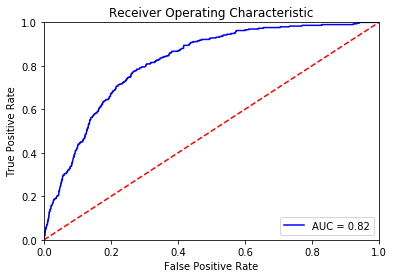

In [43]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5. Провести анализ Reject Inference. Какая доля отказанных заявок? 

In [44]:
binned_X

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,OTHER,elementary,not indicated,"(55245.0, 11450378.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]","(31.148, 39.592]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(9.362, 15.616]","(3.999, 46558.333]"
1,OTHER,elementary,not indicated,"(55245.0, 11450378.0]",0.0,0,"(-0.001, 1.0]","(1.0, 104.917]","(31.148, 39.592]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(9.362, 15.616]","(3.999, 46558.333]"
2,2NDFL,elementary,not indicated,"(55245.0, 11450378.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]","(39.592, 62.321]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(3.999, 46558.333]"
3,OTHER,elementary,Corporate,"(55245.0, 11450378.0]",0.0,1,"(-0.001, 1.0]","(1.0, 104.917]","(25.0, 31.148]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(5.877, 9.362]","(3.999, 46558.333]"
4,OTHER,advanced,Corporate,"(7663.999, 31281.0]",0.0,1,"(-0.001, 1.0]","(0.923, 1.0]","(31.148, 39.592]","(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(5.877, 9.362]","(3.999, 46558.333]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,OTHER,elementary,not indicated,"(55245.0, 11450378.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]","(39.592, 62.321]","(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(5.877, 9.362]","(93135.0, 140901.0]"
32550,2NDFL,elementary,not indicated,"(55245.0, 11450378.0]",0.0,0,"(1.0, 8.0]","(0.0433, 0.923]","(25.0, 31.148]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(5.877, 9.362]","(93135.0, 140901.0]"
32551,2NDFL,elementary,not indicated,"(31281.0, 55245.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]","(25.0, 31.148]","(1.794, 5.264]","(-0.001, 1.0]","(1.0, 8.0]","(0.0017299999999999998, 5.877]","(93135.0, 140901.0]"
32552,2NDFL,advanced,not indicated,"(7663.999, 31281.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]","(25.0, 31.148]","(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(5.877, 9.362]","(93135.0, 140901.0]"


In [45]:
binned_reject = clf_bin.transform(reject)
binned_reject

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,2NDFL,elementary,not indicated,"(7663.999, 31281.0]",0.0,0,"(-0.001, 1.0]","(1.0, 104.917]",NaN,"(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(3.999, 46558.333]"
1,2NDFL,elementary,not indicated,"(7663.999, 31281.0]",0.0,0,"(-0.001, 1.0]","(0.0433, 0.923]",NaN,"(1.794, 5.264]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(3.999, 46558.333]"
2,2NDFL,advanced,not indicated,"(7663.999, 31281.0]",0.0,0,"(-0.001, 1.0]","(1.0, 104.917]",NaN,"(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(3.999, 46558.333]"
3,2NDFL,advanced,not indicated,"(31281.0, 55245.0]",0.0,0,"(-0.001, 1.0]","(0.0433, 0.923]",NaN,"(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(3.999, 46558.333]"
4,2NDFL,elementary,not indicated,"(31281.0, 55245.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]",NaN,"(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(3.999, 46558.333]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,2NDFL,advanced,not indicated,"(7663.999, 31281.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]",NaN,"(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(93135.0, 140901.0]"
10689,OTHER,elementary,not indicated,"(7663.999, 31281.0]",0.0,0,"(-0.001, 1.0]","(1.0, 104.917]",NaN,"(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(93135.0, 140901.0]"
10690,OTHER,elementary,Corporate,"(7663.999, 31281.0]",0.0,1,"(-0.001, 1.0]","(0.0433, 0.923]",NaN,"(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(93135.0, 140901.0]"
10691,OTHER,elementary,not indicated,"(7663.999, 31281.0]",0.0,0,"(-0.001, 1.0]","(0.923, 1.0]",NaN,"(0.04, 1.794]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0017299999999999998, 5.877]","(93135.0, 140901.0]"


In [46]:
#accept_binned_stats[accept_binned_stats['Information_Value'] > 0.02]
accept_binned_stats.sort_values(by=['Event_Rate'], ascending=False)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
38,inquiry_21_day,"(1.0, 8.0]",1344,66,1278,0.049107,0.950893,0.107143,0.041006,0.960439,0.068246
36,inquiry_14_day,"(1.0, 6.0]",957,46,911,0.048067,0.951933,0.074675,0.029231,0.937935,0.044803
15,EDUCATION_,high,1232,39,1193,0.031656,0.968344,0.063312,0.038279,0.503171,0.035447
18,IS_EMPL,0,19167,572,18595,0.029843,0.970157,0.928571,0.596644,0.442327,0.721428
4,COUNT_ACTIVE_CREDIT_NO_CC,"(1.0, 8.0]",2924,85,2839,0.029070,0.970930,0.137987,0.091093,0.415280,0.021958
7,CUSTOMER_CATEGORY_,not indicated,18944,548,18396,0.028927,0.971073,0.889610,0.590259,0.410223,0.516773
26,count_mnth_act_passport,"(0.0017299999999999998, 5.877]",10595,270,10325,0.025484,0.974516,0.438312,0.331291,0.279935,0.049668
10,DEPENDANT_NUMBER,2,41,1,40,0.024390,0.975610,0.001623,0.001283,0.234957,0.002391
12,EDUCATION_,advanced,8371,198,8173,0.023653,0.976347,0.321429,0.262241,0.203512,0.035447
1,CNT_MNTH_FROM_LAST_PMNT,"(0.923, 1.0]",11486,271,11215,0.023594,0.976406,0.439935,0.359847,0.200947,0.081211


# 6. Построить логистическую регрессию на всех заявках с преобразованными переменными WoE.
## Какое значение GINI, F1? Изменилась ли модель? 


# 7. Какую модель вы рекомендуете для внедрения в продуктивную среду? Дать развернутое пояснение
